In [142]:
import tensorflow as tf
from music21 import converter, instrument, note, chord, stream
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import random
from keras.layers.core import Dense, Activation, Flatten
from keras.layers import GRU, Convolution1D, Convolution2D, Flatten, Dropout, Dense
from keras import utils as np_utils
from tensorflow.keras import layers

In [158]:
os.chdir("D:\\lofi_midi\\")
musical_note = []
offset = []
instrumentlist = []
#Load the data
filenames = random.sample(os.listdir('D:\\lofi_midi\\'),94)
musiclist = os.listdir('D:\\lofi_midi\\')

In [159]:
for file in filenames:
    matching = [s for s in musiclist if file.split('_')[0] in s]
    print(matching)
    r1 = matching[random.randint(0, len(matching))]
    string_midi = converter.parse(r1)
    parsednotes = None
    parts = instrument.partitionByInstrument(string_midi)
    instrumentlist.append(parts.parts[0].getInstrument().instrumentName)
    if parts:  # file has instrument parts
        parsednotes = parts.parts[0].recurse()
    else: # file has flat notes
        parsednotes = string_midi.flat.notes
    for element in parsednotes: #detect offset
        offset.append(element.offset)
        if isinstance(element, note.Note):
            musical_note.append(str(element.pitch))
        elif isinstance(element, chord.Chord):
            musical_note.append('.'.join(str(n) for n in element.normalOrder))

['midi_songs_1.mid', 'midi_songs_10.mid', 'midi_songs_11.mid', 'midi_songs_12.mid', 'midi_songs_13.mid', 'midi_songs_14.mid', 'midi_songs_15.mid', 'midi_songs_16.mid', 'midi_songs_17.mid', 'midi_songs_18.mid', 'midi_songs_19.mid', 'midi_songs_2.mid', 'midi_songs_20.mid', 'midi_songs_3.mid', 'midi_songs_4.mid', 'midi_songs_5.mid', 'midi_songs_6.mid', 'midi_songs_7.mid', 'midi_songs_8.mid', 'midi_songs_9.mid', 'midi_songs_Cymatics - Eternity MIDI 1 - C Maj.mid', 'midi_songs_Cymatics - Eternity MIDI 10 - F Min.mid', 'midi_songs_Cymatics - Eternity MIDI 11 - A Maj.mid', 'midi_songs_Cymatics - Eternity MIDI 12 - A Min.mid', 'midi_songs_Cymatics - Eternity MIDI 13 - A Min.mid', 'midi_songs_Cymatics - Eternity MIDI 14 - A Min.mid', 'midi_songs_Cymatics - Eternity MIDI 15 - A# Maj.mid', 'midi_songs_Cymatics - Eternity MIDI 16 - A# Maj (1).mid', 'midi_songs_Cymatics - Eternity MIDI 16 - A# Maj.mid', 'midi_songs_Cymatics - Eternity MIDI 17 - A# Maj.mid', 'midi_songs_Cymatics - Eternity MIDI 18 -

['midi_songs_1.mid', 'midi_songs_10.mid', 'midi_songs_11.mid', 'midi_songs_12.mid', 'midi_songs_13.mid', 'midi_songs_14.mid', 'midi_songs_15.mid', 'midi_songs_16.mid', 'midi_songs_17.mid', 'midi_songs_18.mid', 'midi_songs_19.mid', 'midi_songs_2.mid', 'midi_songs_20.mid', 'midi_songs_3.mid', 'midi_songs_4.mid', 'midi_songs_5.mid', 'midi_songs_6.mid', 'midi_songs_7.mid', 'midi_songs_8.mid', 'midi_songs_9.mid', 'midi_songs_Cymatics - Eternity MIDI 1 - C Maj.mid', 'midi_songs_Cymatics - Eternity MIDI 10 - F Min.mid', 'midi_songs_Cymatics - Eternity MIDI 11 - A Maj.mid', 'midi_songs_Cymatics - Eternity MIDI 12 - A Min.mid', 'midi_songs_Cymatics - Eternity MIDI 13 - A Min.mid', 'midi_songs_Cymatics - Eternity MIDI 14 - A Min.mid', 'midi_songs_Cymatics - Eternity MIDI 15 - A# Maj.mid', 'midi_songs_Cymatics - Eternity MIDI 16 - A# Maj (1).mid', 'midi_songs_Cymatics - Eternity MIDI 16 - A# Maj.mid', 'midi_songs_Cymatics - Eternity MIDI 17 - A# Maj.mid', 'midi_songs_Cymatics - Eternity MIDI 18 -

['midi_songs_1.mid', 'midi_songs_10.mid', 'midi_songs_11.mid', 'midi_songs_12.mid', 'midi_songs_13.mid', 'midi_songs_14.mid', 'midi_songs_15.mid', 'midi_songs_16.mid', 'midi_songs_17.mid', 'midi_songs_18.mid', 'midi_songs_19.mid', 'midi_songs_2.mid', 'midi_songs_20.mid', 'midi_songs_3.mid', 'midi_songs_4.mid', 'midi_songs_5.mid', 'midi_songs_6.mid', 'midi_songs_7.mid', 'midi_songs_8.mid', 'midi_songs_9.mid', 'midi_songs_Cymatics - Eternity MIDI 1 - C Maj.mid', 'midi_songs_Cymatics - Eternity MIDI 10 - F Min.mid', 'midi_songs_Cymatics - Eternity MIDI 11 - A Maj.mid', 'midi_songs_Cymatics - Eternity MIDI 12 - A Min.mid', 'midi_songs_Cymatics - Eternity MIDI 13 - A Min.mid', 'midi_songs_Cymatics - Eternity MIDI 14 - A Min.mid', 'midi_songs_Cymatics - Eternity MIDI 15 - A# Maj.mid', 'midi_songs_Cymatics - Eternity MIDI 16 - A# Maj (1).mid', 'midi_songs_Cymatics - Eternity MIDI 16 - A# Maj.mid', 'midi_songs_Cymatics - Eternity MIDI 17 - A# Maj.mid', 'midi_songs_Cymatics - Eternity MIDI 18 -

['midi_songs_1.mid', 'midi_songs_10.mid', 'midi_songs_11.mid', 'midi_songs_12.mid', 'midi_songs_13.mid', 'midi_songs_14.mid', 'midi_songs_15.mid', 'midi_songs_16.mid', 'midi_songs_17.mid', 'midi_songs_18.mid', 'midi_songs_19.mid', 'midi_songs_2.mid', 'midi_songs_20.mid', 'midi_songs_3.mid', 'midi_songs_4.mid', 'midi_songs_5.mid', 'midi_songs_6.mid', 'midi_songs_7.mid', 'midi_songs_8.mid', 'midi_songs_9.mid', 'midi_songs_Cymatics - Eternity MIDI 1 - C Maj.mid', 'midi_songs_Cymatics - Eternity MIDI 10 - F Min.mid', 'midi_songs_Cymatics - Eternity MIDI 11 - A Maj.mid', 'midi_songs_Cymatics - Eternity MIDI 12 - A Min.mid', 'midi_songs_Cymatics - Eternity MIDI 13 - A Min.mid', 'midi_songs_Cymatics - Eternity MIDI 14 - A Min.mid', 'midi_songs_Cymatics - Eternity MIDI 15 - A# Maj.mid', 'midi_songs_Cymatics - Eternity MIDI 16 - A# Maj (1).mid', 'midi_songs_Cymatics - Eternity MIDI 16 - A# Maj.mid', 'midi_songs_Cymatics - Eternity MIDI 17 - A# Maj.mid', 'midi_songs_Cymatics - Eternity MIDI 18 -

['midi_songs_1.mid', 'midi_songs_10.mid', 'midi_songs_11.mid', 'midi_songs_12.mid', 'midi_songs_13.mid', 'midi_songs_14.mid', 'midi_songs_15.mid', 'midi_songs_16.mid', 'midi_songs_17.mid', 'midi_songs_18.mid', 'midi_songs_19.mid', 'midi_songs_2.mid', 'midi_songs_20.mid', 'midi_songs_3.mid', 'midi_songs_4.mid', 'midi_songs_5.mid', 'midi_songs_6.mid', 'midi_songs_7.mid', 'midi_songs_8.mid', 'midi_songs_9.mid', 'midi_songs_Cymatics - Eternity MIDI 1 - C Maj.mid', 'midi_songs_Cymatics - Eternity MIDI 10 - F Min.mid', 'midi_songs_Cymatics - Eternity MIDI 11 - A Maj.mid', 'midi_songs_Cymatics - Eternity MIDI 12 - A Min.mid', 'midi_songs_Cymatics - Eternity MIDI 13 - A Min.mid', 'midi_songs_Cymatics - Eternity MIDI 14 - A Min.mid', 'midi_songs_Cymatics - Eternity MIDI 15 - A# Maj.mid', 'midi_songs_Cymatics - Eternity MIDI 16 - A# Maj (1).mid', 'midi_songs_Cymatics - Eternity MIDI 16 - A# Maj.mid', 'midi_songs_Cymatics - Eternity MIDI 17 - A# Maj.mid', 'midi_songs_Cymatics - Eternity MIDI 18 -

['midi_songs_1.mid', 'midi_songs_10.mid', 'midi_songs_11.mid', 'midi_songs_12.mid', 'midi_songs_13.mid', 'midi_songs_14.mid', 'midi_songs_15.mid', 'midi_songs_16.mid', 'midi_songs_17.mid', 'midi_songs_18.mid', 'midi_songs_19.mid', 'midi_songs_2.mid', 'midi_songs_20.mid', 'midi_songs_3.mid', 'midi_songs_4.mid', 'midi_songs_5.mid', 'midi_songs_6.mid', 'midi_songs_7.mid', 'midi_songs_8.mid', 'midi_songs_9.mid', 'midi_songs_Cymatics - Eternity MIDI 1 - C Maj.mid', 'midi_songs_Cymatics - Eternity MIDI 10 - F Min.mid', 'midi_songs_Cymatics - Eternity MIDI 11 - A Maj.mid', 'midi_songs_Cymatics - Eternity MIDI 12 - A Min.mid', 'midi_songs_Cymatics - Eternity MIDI 13 - A Min.mid', 'midi_songs_Cymatics - Eternity MIDI 14 - A Min.mid', 'midi_songs_Cymatics - Eternity MIDI 15 - A# Maj.mid', 'midi_songs_Cymatics - Eternity MIDI 16 - A# Maj (1).mid', 'midi_songs_Cymatics - Eternity MIDI 16 - A# Maj.mid', 'midi_songs_Cymatics - Eternity MIDI 17 - A# Maj.mid', 'midi_songs_Cymatics - Eternity MIDI 18 -

IndexError: list index out of range

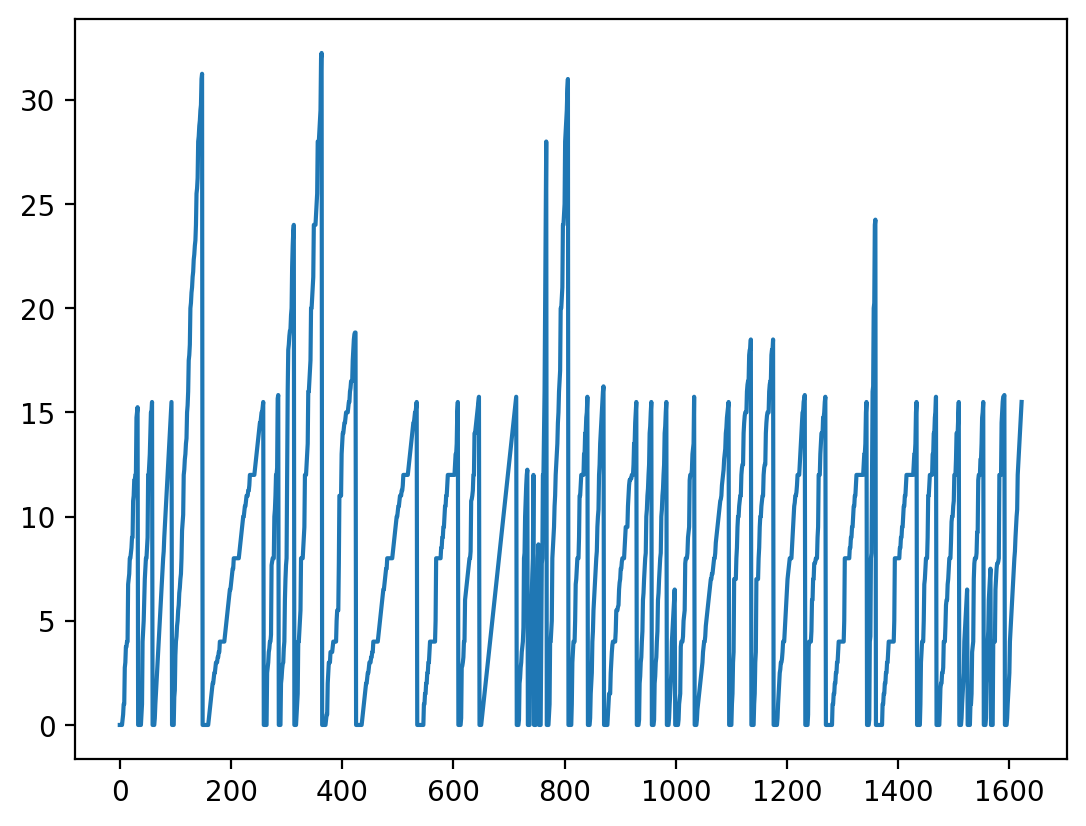

In [160]:
#Exploratory data analysis(EDA)
pd.Series(instrumentlist).value_counts()
pd.Series(instrumentlist).value_counts()
pd.Series(musical_note).value_counts()
pd.Series(musical_note).value_counts()
offset = [float(item) for item in offset]
plt.plot(offset)
plt.show() # this shows that offset is normally started from 0 for each musical file

In [161]:
sequence_length = 100
# Arranging notes and chords in ascending order
pitchcategory = sorted(set(item for item in musical_note))
# One hot encoding
note_encoding = dict((note, number) for number, note in
enumerate(pitchcategory))
model_input_original = []
model_output = []
# Prepare input and output data for model
for i in range(0, len(musical_note) - sequence_length, 1):
    sequence_in = musical_note[i:i + sequence_length]
    sequence_out = musical_note[i + sequence_length]
    model_input_original.append([note_encoding[char] for char in sequence_in])
    model_output.append(note_encoding[sequence_out])
n_patterns = len(model_input_original)
# converting data for compatibility with GRU
model_input = np.reshape(model_input_original, (n_patterns,
sequence_length, 1))
# standardizing model input data
model_output = np_utils.to_categorical(model_output)
Len_Notes = model_output.shape[1]
model_input = model_input / float(Len_Notes)

In [162]:
# Model
model_GRU = tf.keras.models.Sequential()
model_GRU.add(layers.GRU(16,input_shape=(model_input.
shape[1], model_input.shape[2]),return_sequences=True))
model_GRU.add(layers.Dropout(0.3))
model_GRU.add(layers.GRU(64, return_sequences=True))
model_GRU.add(layers.Dropout(0.3))
model_GRU.add(layers.GRU(64))
model_GRU.add(layers.Dense(16))
model_GRU.add(layers.Dropout(0.3))
model_GRU.add(layers.Dense(Len_Notes))
model_GRU.add(layers.Activation('softmax'))
model_GRU.compile(loss='categorical_crossentropy', optimizer='rmsprop')
model_GRU.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_15 (GRU)                (None, 100, 16)           912       
                                                                 
 dropout_15 (Dropout)        (None, 100, 16)           0         
                                                                 
 gru_16 (GRU)                (None, 100, 64)           15744     
                                                                 
 dropout_16 (Dropout)        (None, 100, 64)           0         
                                                                 
 gru_17 (GRU)                (None, 64)                24960     
                                                                 
 dense_10 (Dense)            (None, 16)                1040      
                                                                 
 dropout_17 (Dropout)        (None, 16)               

In [163]:
# initializing data for model prediction
int_to_note = dict((number, note) for number, note in enumerate(pitchcategory))
pattern = model_input_original[0]
prediction_output = []
model_GRU.fit(model_input, model_output, epochs=60, batch_size=70)

Epoch 1/60
13/13 [==============================] - 7s 111ms/step - loss: 5.1523
Epoch 2/60
13/13 [==============================] - 1s 113ms/step - loss: 4.9443
Epoch 3/60
13/13 [==============================] - 1s 113ms/step - loss: 4.8605
Epoch 4/60
13/13 [==============================] - 1s 113ms/step - loss: 4.7705
Epoch 5/60
13/13 [==============================] - 1s 114ms/step - loss: 4.7312
Epoch 6/60
13/13 [==============================] - 1s 115ms/step - loss: 4.7253
Epoch 7/60
13/13 [==============================] - 2s 117ms/step - loss: 4.7019
Epoch 8/60
13/13 [==============================] - 2s 118ms/step - loss: 4.7008
Epoch 9/60
13/13 [==============================] - 2s 121ms/step - loss: 4.6825
Epoch 10/60
13/13 [==============================] - 2s 121ms/step - loss: 4.6615
Epoch 11/60
13/13 [==============================] - 2s 124ms/step - loss: 4.6660
Epoch 12/60
13/13 [==============================] - 2s 119ms/step - loss: 4.6469
Epoch 13/60
13/13 [======

In [164]:
for note_index in range(500):
    prediction_input = np.reshape(pattern, (1, len(pattern), 1))
    prediction_input = prediction_input / float(Len_Notes)
    prediction_GRU = model_GRU.predict(prediction_input, verbose=0)
    index_GRU = np.argmax(prediction_GRU)
    index = index_GRU
    result = int_to_note[index]
    prediction_output.append(result)
    pattern = np.append(pattern,index)
    pattern = pattern[1:len(pattern)]

In [165]:
# prepare notes , chords and offset separately
offlen = len(offset)
DifferentialOffset = (max(offset)-min(offset))/ len(offset)
if offset_length == 0:
    raise ValueError("Offset list cannot be empty.")
offset2 = offset.copy()
output_notes = []
i = 0
offset = []
initial = 0
for i in range(len(offset2)):
    offset.append(initial)
    initial = initial+DifferentialOffset
# Differentiate notes and chords
i=0
for pattern in prediction_output:
    if ('.' in pattern) or pattern.isdigit():
        notes_in_chord = pattern.split('.')
        notes = []
        for check_note in notes_in_chord:
            gen_note = note.Note(int(check_note))
            gen_note.storedInstrument = instrument.Guitar()
            notes.append(gen_note)
        gen_chord = chord.Chord(notes)
        gen_chord.offset = offset[i]
        output_notes.append(gen_chord)
    else:
        gen_note = note.Note(pattern)
        gen_note.offset = offset[i]
        gen_note.storedInstrument = instrument.Piano()
        output_notes.append(gen_note)
    i=i+1

In [166]:
os.chdir('D:\\')
#Specify file path to store the MIDI file.
midi_stream = stream.Stream(output_notes) #create stream
midi_stream.write('midi', fp='GRU_output.mid') #createMIDI file using stream

'GRU_output.mid'

In [128]:
from music21 import note, chord, instrument

# Ensure offset length is determined correctly
offset_length = len(offset)
if offset_length == 0:
    raise ValueError("Offset list cannot be empty.")

# Calculate the differential offset
differential_offset = (max(offset) - min(offset)) / offset_length

# Initialize a new offset list with equally spaced values
offset2 = offset.copy()
offset = [0]  # Start with the initial value at 0
for i in range(1, offset_length):
    offset.append(offset[i-1] + differential_offset)

# Adjust the offset list to match the length of prediction_output if needed
while len(offset) < len(prediction_output):
    offset.append(offset[-1] + differential_offset)

# Prepare to generate output notes
output_notes = []

# Iterate over the prediction output and create corresponding music21 objects
for i, pattern in enumerate(prediction_output):
    # Ensure we do not go out of range
    if i >= len(offset):
        break

    # Check if the pattern represents a chord
    if ('.' in pattern) or pattern.isdigit():
        # Split the pattern to get individual notes in the chord
        notes_in_chord = pattern.split('.')
        notes = []
        for check_note in notes_in_chord:
            gen_note = note.Note(int(check_note))
            gen_note.storedInstrument = instrument.Piano()
            notes.append(gen_note)
        # Create a chord object with the notes
        gen_chord = chord.Chord(notes)
        gen_chord.offset = offset[i]
        output_notes.append(gen_chord)
    else:
        # Create a single note object
        gen_note = note.Note(pattern)
        gen_note.offset = offset[i]
        gen_note.storedInstrument = instrument.Guitar()
        output_notes.append(gen_note)

# Now output_notes contains all the generated music21 note and chord objects


In [167]:
fctr = 1.5 # scale (in this case stretch) the overall tempo by this factor
score = converter.parse('D://GRU_output.mid')
newscore = score.scaleOffsets(fctr).scaleDurations(fctr)

newscore.write('midi','D://song_slow.mid') 

'D://song_slow.mid'